In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#苏州街租金单价
suzhoujie_rental=pd.read_csv("/Users/macbookair/Documents/苏州街租金信息.csv")
suzhoujie_rental["单价"]=round(suzhoujie_rental["价格"]/suzhoujie_rental["面积(㎡)"],2)
suzhoujie_rental_median=suzhoujie_rental["单价"].median()

df1=pd.DataFrame({"单位租金":suzhoujie_rental["单价"],"location":["苏州街"]*suzhoujie_rental["单价"].shape[0],"面积":suzhoujie_rental["面积(㎡)"]})
suzhoujie_rental_median

154.07999999999998

In [3]:
#苏州街房价
suzhoujie_price=pd.read_csv("/Users/macbookair/Documents/苏州街房子信息.csv")
suzhoujie_price_median=suzhoujie_price["单价(元/㎡)"].median()
suzhoujie_price_df=pd.DataFrame({"单价":suzhoujie_price["单价(元/㎡)"],"location":["苏州街"]*suzhoujie_price["单价(元/㎡)"].shape[0],
                                "面积":suzhoujie_price["面积(㎡)"]})
suzhoujie_price_median

85532.0

In [4]:
#万柳租金单价
rental3=pd.read_csv("/Users/macbookair/Documents/万柳租金信息.csv")
rental3["单价"]=rental3["价格"]/rental3["面积(㎡)"]
rental3_median=rental3["单价"].median()
area3=rental3["面积(㎡)"]
df2=pd.DataFrame({"单位租金":rental3["单价"],"location":["万柳"]*rental3["单价"].shape[0],"面积":area3})
rental3["单价"].mean()


181.89606227950688

In [5]:
#万柳房价
price3=pd.read_csv("/Users/macbookair/Documents/万柳房价.csv")
price3_median=price3["单价（元/㎡）"].median()
price3_df=pd.DataFrame({"单价":price3["单价（元/㎡）"],"location":["万柳"]*price3["单价（元/㎡）"].shape[0],
                       "面积":price3["面积（㎡）"]})
price3_median

145637.0

In [6]:
#北太平庄租金单价
rental2=pd.read_csv("/Users/macbookair/Documents/北太平庄房租.csv")
rental2["单价"]=rental2["价格"]/rental2["面积（㎡）"]
rental2_median=rental2["单价"].median()
area2=rental2["面积（㎡）"]
df3=pd.DataFrame({"单位租金":rental2["单价"],"location":["北太平庄"]*rental2["单价"].shape[0],"面积":area2})
rental2_median

136.74603174603175

In [7]:
#北太平庄房价
price2=pd.read_csv("/Users/macbookair/Documents/北太平庄房价.csv")
price2_median=price2["单价(元/㎡)"].median()
price2_df=pd.DataFrame({"单价":price2["单价(元/㎡)"],"location":["北太平庄"]*price2["单价(元/㎡)"].shape[0],
                       "面积":price2["面积（㎡）"]})
price2_median

90898.0

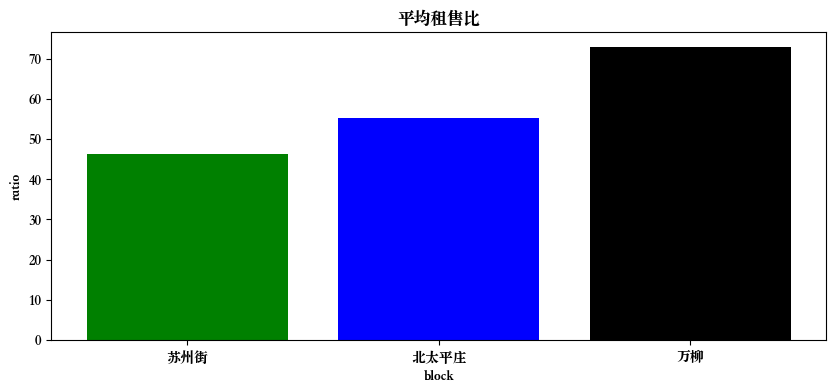

In [8]:
#租售比的条形图
plt.rcParams['font.sans-serif'] = ['Songti SC']
plt.figure(figsize=(10, 4))
locations = ["苏州街", "北太平庄","万柳"]
median_rent=[suzhoujie_price_median/(suzhoujie_rental_median*12),price2_median/(rental2_median*12),price3_median/(rental3_median*12)]
plt.bar(locations,median_rent, color=["green","blue","black"])
plt.xlabel("block")
plt.ylabel("ratio")
plt.title("平均租售比")
plt.show()


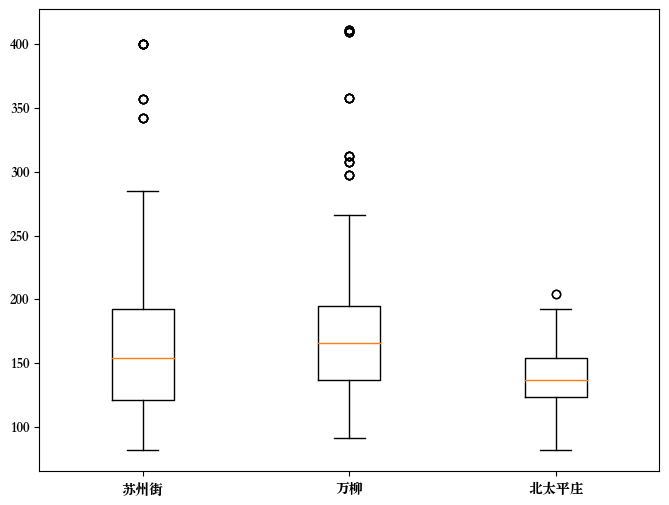

In [9]:
#房租的箱线图判断离群点
plt.rcParams['font.sans-serif'] = ['Songti SC']
plt.figure(figsize=(8,6))
data=[suzhoujie_rental["单价"],rental3["单价"],rental2["单价"]]
plt.boxplot(data, labels=['苏州街', '万柳', '北太平庄'])
plt.show()

In [10]:
#房租数据合并
df_combined = pd.concat([df1, df2, df3], ignore_index=True)
df_combined

,单位租金,location,面积
0,121.210000,苏州街,66
1,400.000000,苏州街,10
2,200.000000,苏州街,100
3,173.330000,苏州街,75
4,116.420000,苏州街,67
...,...,...,...
659,162.162162,北太平庄,74
660,131.578947,北太平庄,95
661,118.292683,北太平庄,82
662,131.578947,北太平庄,95


In [11]:
#房租独热编码
df = pd.get_dummies(df_combined, columns=['location'])
df['m2_万柳_interaction'] = df['面积'] * df['location_万柳']
df['m2_北太平庄_interaction'] = df['面积'] * df['location_北太平庄']
df['m2_苏州街_interaction'] = df['面积'] * df['location_苏州街']




/Users/macbookair/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/macbookair/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


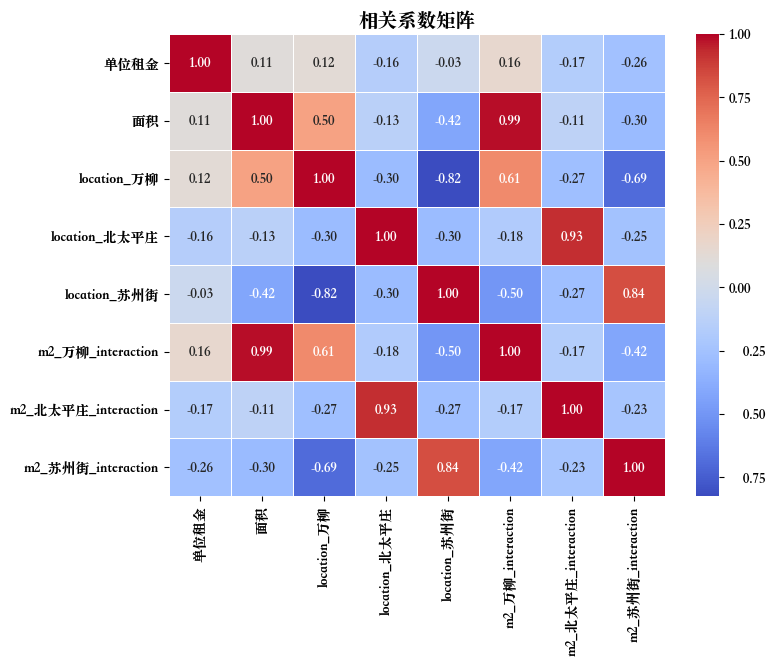

In [12]:
#房租的相关系数矩阵
plt.rcParams['font.sans-serif'] = ['Songti SC']
corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("相关系数矩阵", fontsize=14)
plt.show()

In [13]:
X = df[['面积', "location_万柳", 'location_北太平庄','location_苏州街', 'm2_北太平庄_interaction','m2_苏州街_interaction']]
y=df["单位租金"]

model = LinearRegression()
model.fit(X, y)
print(f"回归系数: {model.coef_}")
print(f"截距: {model.intercept_}")
print(f"R² 分数: {model.score(X, y)}")


回归系数: [ 4.88900839e-02 -2.78191689e+01 -3.12615551e+01  5.90807240e+01
 -4.80442203e-01 -1.68441569e+00]
截距: 198.52429092368914
R² 分数: 0.22615464561819165


In [14]:
new_data = pd.DataFrame({
    '面积': [50, 50, 50], 
    'location_万柳': [0, 0, 1],
    'location_北太平庄': [0, 1, 0], 
    'location_苏州街': [1, 0, 0],  
    
    'm2_北太平庄_interaction': [100 * 0, 150 * 1, 200 * 0],
      
    'm2_苏州街_interaction': [100 * 1, 150 * 0, 200 * 0],  

      # 面积与北太平庄的交互项
})
predictions = model.predict(new_data)
print("苏州街预测的单位价格:", predictions[0])
print("北太平庄预测的单位价格:", predictions[1])
print("万柳预测的单位价格:", predictions[2])

苏州街预测的单位价格: 91.60794988992593
北太平庄预测的单位价格: 97.64090952179299
万柳预测的单位价格: 173.14962626102997


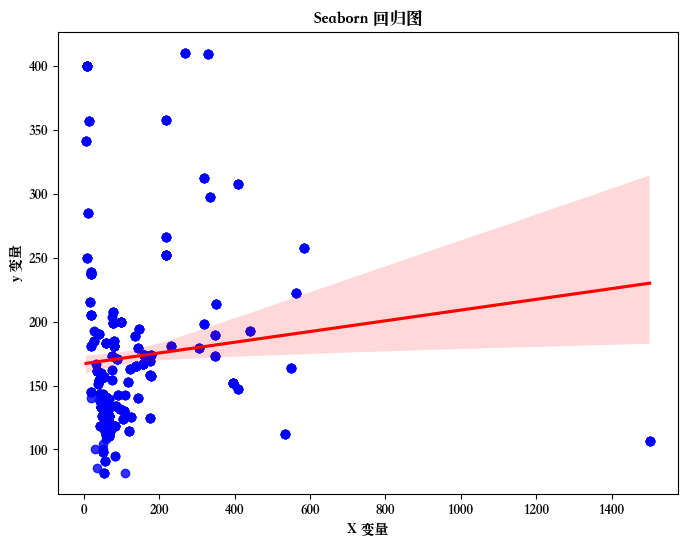

In [15]:
plt.figure(figsize=(8,6))
sns.regplot(x=df["面积"], y=df["单位租金"], data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel("X 变量")
plt.ylabel("y 变量")
plt.title("Seaborn 回归图")
plt.show()

In [16]:
#房价数据合并
df_combined2 = pd.concat([suzhoujie_price_df,price2_df,price3_df])


In [17]:
#房价的多元回归
df2 = pd.get_dummies(df_combined2, columns=['location'])
df2['m2_苏州街_interaction'] = df2['面积'] * df2['location_苏州街']
df2['m2_万柳_interaction'] = df2['面积'] * df2['location_万柳']
df2['m2_北太平庄_interaction'] = df2['面积'] * df2['location_北太平庄']


/Users/macbookair/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/macbookair/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


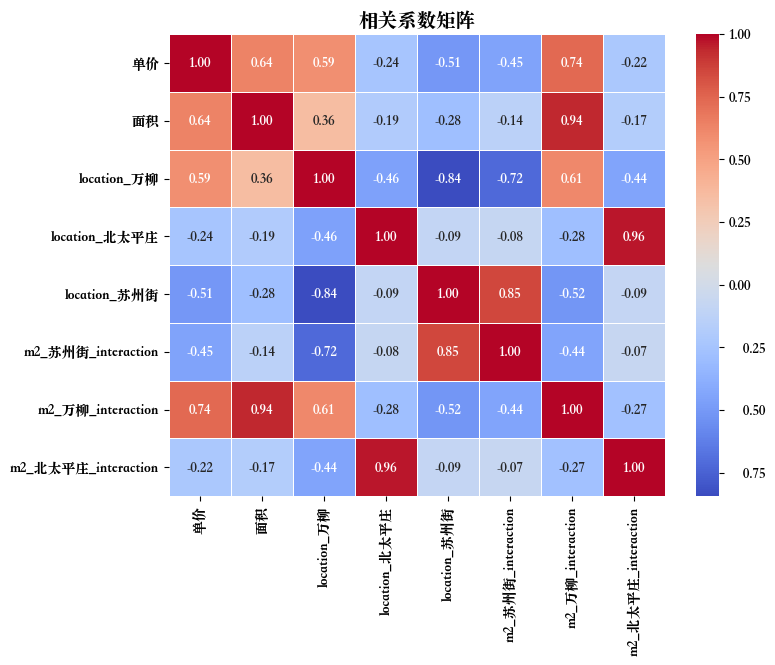

In [18]:
plt.rcParams['font.sans-serif'] = ['Songti SC']
corr_matrix2= df2.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix2, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("相关系数矩阵", fontsize=14)
plt.show()

In [19]:
#m2_万柳_interaction与面积存在多元共线性，会导致偏误较大，所以在回归时删去变量

In [20]:
X = df2[['面积', 'location_苏州街', 'location_北太平庄',"location_万柳",'m2_苏州街_interaction', 'm2_北太平庄_interaction']]
y=df2["单价"]
model = LinearRegression()
model.fit(X, y)
print(f"回归系数: {model.coef_}")
print(f"截距: {model.intercept_}")
print(f"R² 分数: {model.score(X, y)}")

回归系数: [   249.90281392   4289.03553139 -27941.5862317   23652.55070031
   -328.63419588    212.80542338]
截距: 88202.23080705461
R² 分数: 0.5764832845615898


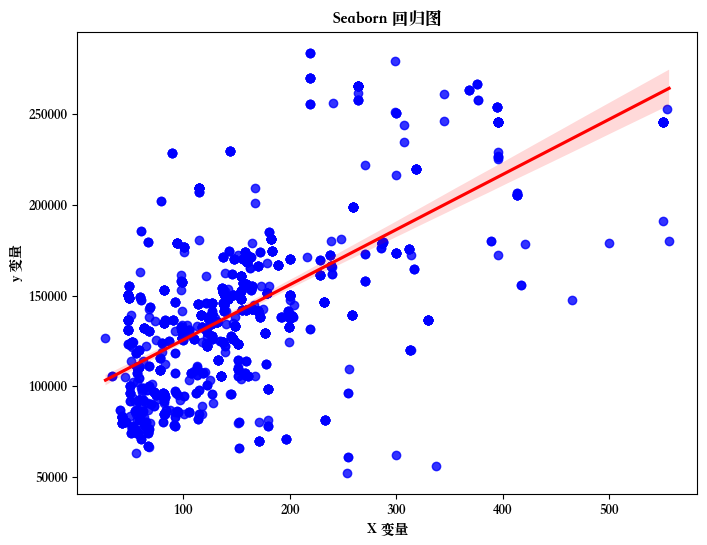

In [21]:
plt.figure(figsize=(8,6))
sns.regplot(x=df2["面积"], y=df2["单价"], data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel("X 变量")
plt.ylabel("y 变量")
plt.title("Seaborn 回归图")
plt.show()

In [22]:
#房价预测
new_data = pd.DataFrame({
    '面积': [50, 50, 50],  
    'location_苏州街': [1, 0, 0],  
    'location_北太平庄': [0, 1, 0],  
    'location_万柳': [0, 0, 1],  
    'm2_苏州街_interaction': [100 * 1, 150 * 0, 200 * 0],  

    'm2_北太平庄_interaction': [100 * 0, 150* 1, 200 * 0] # 面积与北太平庄的交互项
})
predictions = model.predict(new_data)
print("苏州街预测的单位价格:", predictions[0])
print("北太平庄预测的单位价格:", predictions[1])
print("万柳预测的单位价格:", predictions[2])

苏州街预测的单位价格: 72122.98744626455
北太平庄预测的单位价格: 104676.59877878503
万柳预测的单位价格: 124349.92220347682


In [23]:
new_data = pd.DataFrame({
    '面积': [100, 100, 100],  
    'location_苏州街': [1, 0, 0],  
    'location_北太平庄': [0, 1, 0],  
    'location_万柳': [0, 0, 1],  
    'm2_苏州街_interaction': [100 * 1, 150 * 0, 200 * 0],  
      
    'm2_北太平庄_interaction': [100 * 0, 150 * 1, 200 * 0]  # 面积与北太平庄的交互项
})
predictions = model.predict(new_data)
print("苏州街预测的单位价格:", predictions[0])
print("北太平庄预测的单位价格:", predictions[1])
print("万柳预测的单位价格:", predictions[2])

苏州街预测的单位价格: 84618.12814237889
北太平庄预测的单位价格: 117171.73947489937
万柳预测的单位价格: 136845.06289959114
